<a href="https://colab.research.google.com/github/PritcyVeke/Project1/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [13]:
Movie_gross=pd.read_csv("bom.movie_gross.csv.gz")
Movie_gross.head(2)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [18]:
Movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
# Changing data type
Movie_gross['foreign_gross'] = Movie_gross['foreign_gross'].astype(float)

In [24]:
# Convert the 'foreign_gross' column to numeric, coercing errors
Movie_gross['foreign_gross'] = pd.to_numeric(Movie_gross['foreign_gross'], errors='coerce')


In [25]:
Movie_gross.dropna(subset=['foreign_gross'], inplace=True)

In [27]:
Movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2032 non-null   object 
 1   studio          2028 non-null   object 
 2   domestic_gross  2004 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            2032 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 95.2+ KB


In [33]:
#mising points for first 10 columns
missingvalue =Movie_gross.isnull() .sum()
missingvalue[0:1000]

title              0
studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [ ]:
import numpy as np

In [45]:
#total number of cells in data
total_cells = np.product(Movie_gross.shape)
print(total_cells)

10160


In [46]:
#total missing cells
total_missing = missingvalue.sum()
print(total_missing)

32


In [47]:

#percrnt of data missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.31496062992125984


In [49]:
#droping missing values
Movie_gross.dropna()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [50]:
Movie_gross.shape

(2032, 5)

In [51]:
#descriptive analysis
Movie_gross.describe()

,domestic_gross,foreign_gross,year
count,2.004000e+03,2.032000e+03,2032.000000
mean,4.566975e+07,7.505704e+07,2013.486713
std,7.637549e+07,1.375294e+08,2.591852
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.617500e+05,3.775000e+06,2011.000000
50%,1.635000e+07,1.890000e+07,2013.000000
75%,5.570000e+07,7.505000e+07,2016.000000
max,7.001000e+08,9.605000e+08,2018.000000


In [69]:
Studio_domesticgross = Movie_gross.groupby('studio')['domestic_gross'].sum().reset_index()


In [70]:
Studio_domesticgross.shape

(175, 2)

In [71]:
Studio_domesticgross.head(175)

,studio,domestic_gross
0,3D,6.100000e+06
1,A24,2.604568e+08
2,AF,1.155000e+06
3,AGF,1.580000e+04
4,AR,3.500000e+05
...,...,...
170,WOW,3.080000e+04
171,Wein.,1.471817e+09
172,Yash,2.247380e+07
173,Zee,1.100000e+06


In [57]:
#visualization
import matplotlib.pyplot as plt

In [58]:
#libraries for treemap
pip install squarify

In [59]:
import squarify

RecursionError: ignored

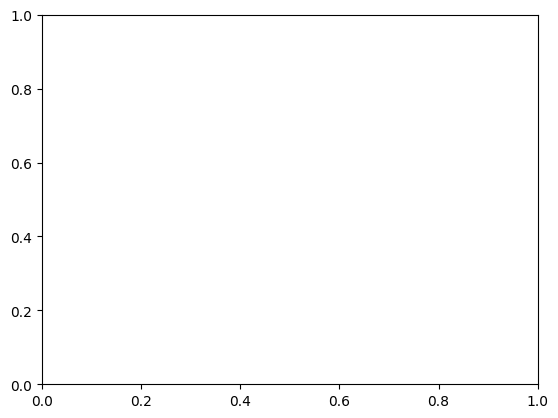

In [63]:
#ploting studio against domestic gross

squarify.plot(sizes=Movie_gross['domestic_gross'], label=Movie_gross['studio'], alpha=.8 )
plt.axis('off')
plt.show()


In [14]:
title_rating=pd.read_csv("imdb.title.ratings.csv.gz")
title_rating.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [15]:
Movieinfo=pd.read_csv("movie_info.csv")
Movieinfo.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [16]:
title_Crew=pd.read_csv("imdb.title.crew.csv.gz")
title_Crew.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


In [6]:
Movie=pd.read_csv("tmdb.movies.csv.gz")


<bound method DataFrame.info of                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0

In [17]:
Movie_budgets=pd.read_csv("tn.movie_budgets.csv.gz")
Movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
